In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('supermarket_sales.csv',parse_dates=['Date'])

In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
data.isnull().sum().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [6]:
# random 7 rows
data.sample(7)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
110,479-26-8945,B,Mandalay,Member,Female,Sports and travel,16.49,2,1.649,34.629,2019-02-05,11:32,Ewallet,32.98,4.761905,1.649,4.6
446,235-46-8343,C,Naypyitaw,Member,Male,Food and beverages,27.66,10,13.830,290.430,2019-02-14,11:26,Credit card,276.60,4.761905,13.830,8.9
60,285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.711,77.931,2019-02-15,17:47,Credit card,74.22,4.761905,3.711,10.0
898,725-54-0677,C,Naypyitaw,Member,Male,Health and beauty,85.60,7,29.960,629.160,2019-03-02,13:50,Cash,599.20,4.761905,29.960,5.3
215,802-43-8934,A,Yangon,Normal,Male,Home and lifestyle,18.28,1,0.914,19.194,2019-03-22,15:05,Credit card,18.28,4.761905,0.914,8.3
453,568-88-3448,A,Yangon,Normal,Male,Health and beauty,25.00,1,1.250,26.250,2019-03-03,15:09,Ewallet,25.00,4.761905,1.250,5.5
795,605-83-1050,B,Mandalay,Normal,Male,Fashion accessories,27.18,2,2.718,57.078,2019-03-15,16:26,Ewallet,54.36,4.761905,2.718,4.3


In [7]:
# statistical analysis
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


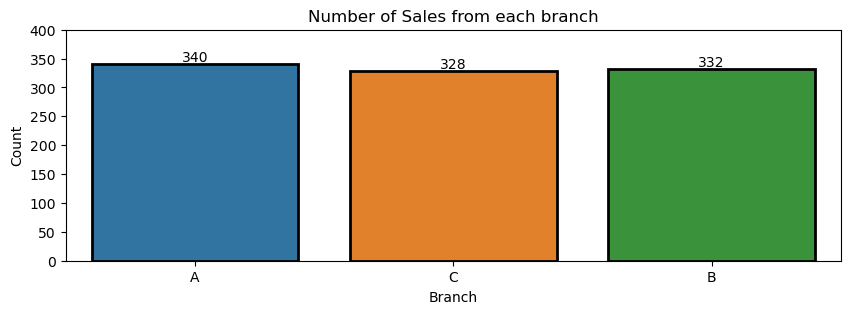

In [8]:
# Number of Sales from each Branch
fig,ax = plt.subplots(figsize=(10,3))
sns.countplot(data=data,x='Branch',ec='k',lw=2,ax=ax)
ax.bar_label(ax.containers[0])
plt.ylim(0,400)
plt.ylabel('Count')
plt.xlabel('Branch')
plt.title('Number of Sales from each branch')
plt.show()

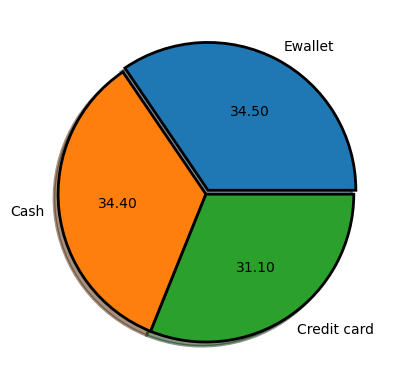

Ewallet is the Most Popular Payment method used by Customers 


In [9]:
# Most Popular Payment method used by Customers
a = data['Payment'].value_counts(normalize=True)*100
b = data['Payment'].value_counts(normalize=True).keys()
plt.pie(a,labels=b,explode=[.03,0,0],shadow=True,wedgeprops={'ec':'k','lw':2},autopct='%.2f',radius=1)
plt.show()
print('Ewallet is the Most Popular Payment method used by Customers ')

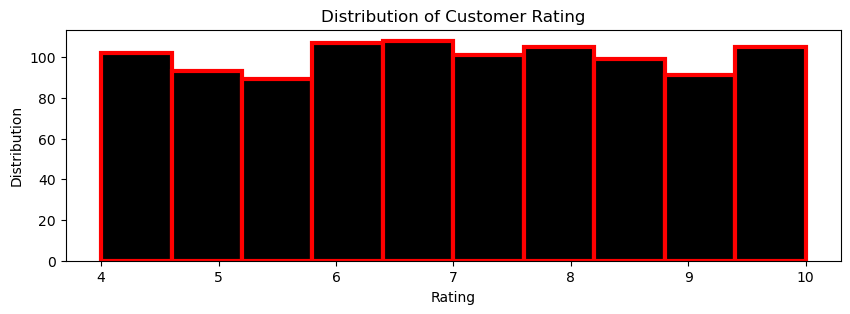

In [10]:
# Distribution of Customer Rating
plt.figure(figsize=(10,3))
plt.hist(data['Rating'],ec='r',lw=3,color='k')
plt.ylabel('Distribution')
plt.xlabel('Rating')
plt.title('Distribution of Customer Rating')
plt.show()

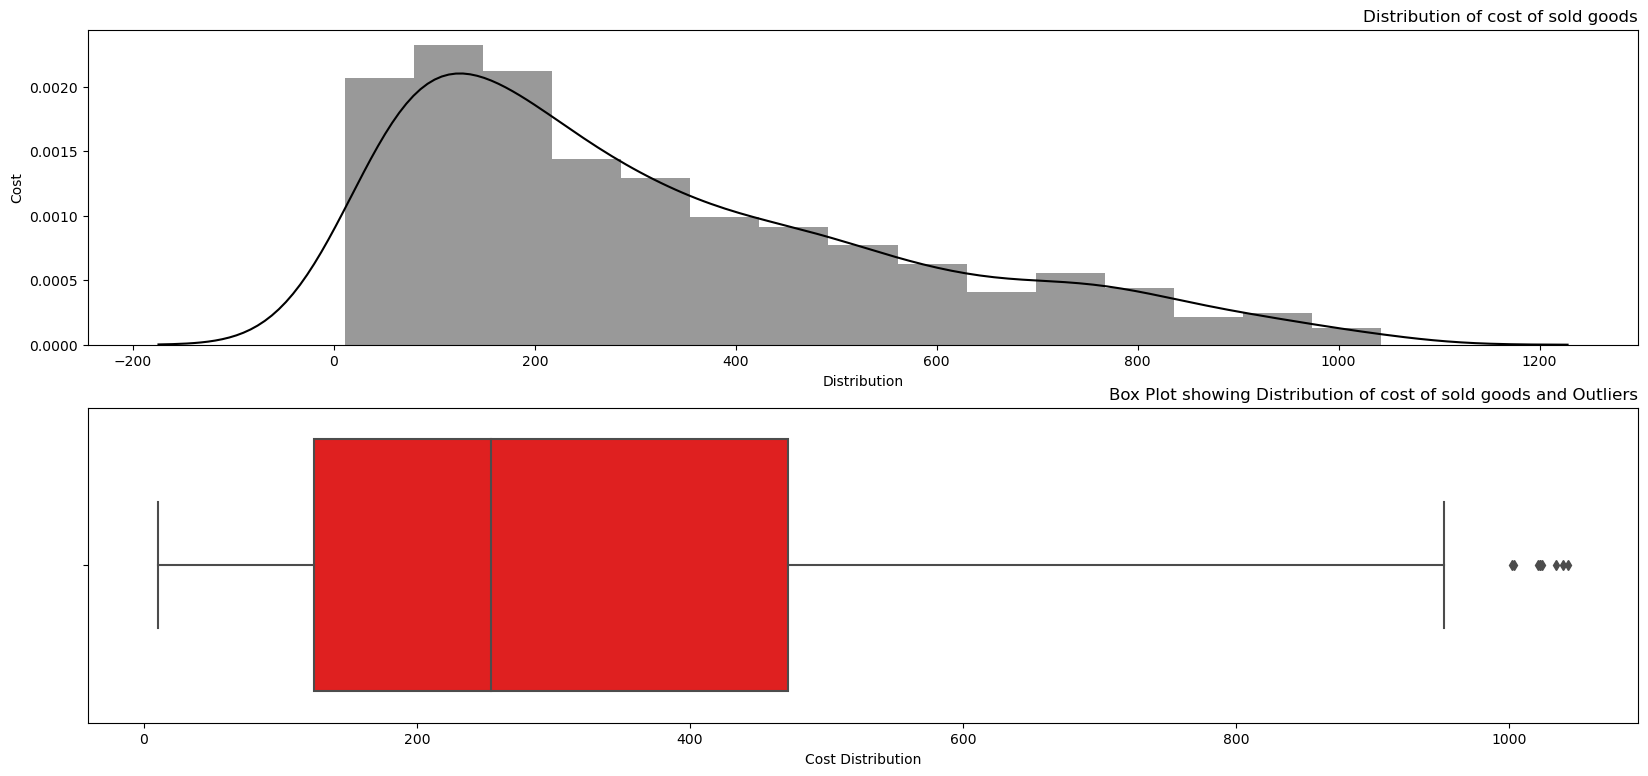

Distribution of cost of sold goods is right skewed


In [11]:
# Distribution of cost of sold goods
plt.figure(figsize=(20,9))
plt.subplot(2,1,1)
sns.distplot(data['Total'],color='k')
plt.ylabel('Cost')
plt.xlabel('Distribution')
plt.title('Distribution of cost of sold goods',loc='right')
plt.subplot(2,1,2)
sns.boxplot(data['Total'],color='r')
plt.xlabel('Cost Distribution')
plt.title('Box Plot showing Distribution of cost of sold goods and Outliers',loc='right')
plt.show()
print('Distribution of cost of sold goods is right skewed')

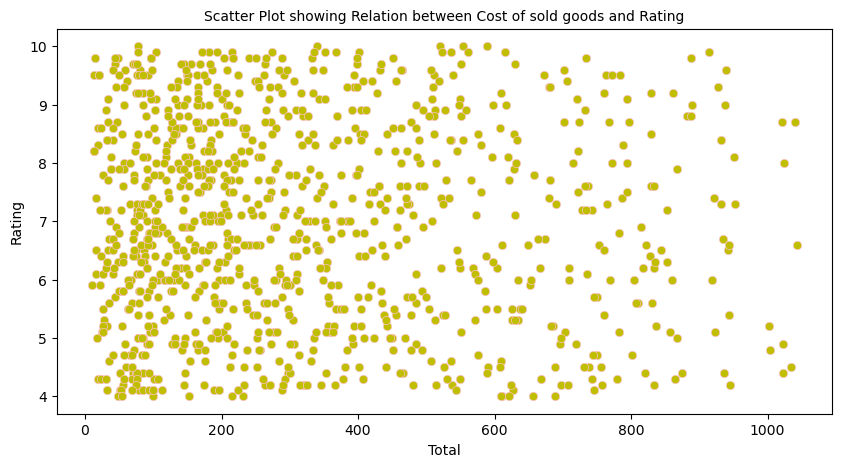

Scatter Plot shows no relation between Cost of Sold Goods and Rating


In [12]:
# Affect of Cost of Sold Goods on Rating
plt.figure(figsize=(10,5))
sns.scatterplot(data['Total'],data['Rating'],color='y',ec='pink',lw=3)
plt.title('Scatter Plot showing Relation between Cost of sold goods and Rating',fontsize=10)
plt.show()
print('Scatter Plot shows no relation between Cost of Sold Goods and Rating')

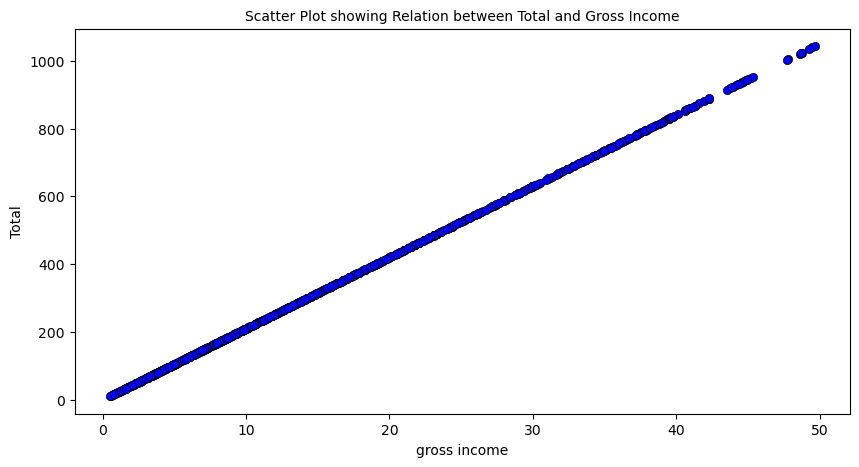

Scatter Plot shows relation between Total and Gross Income


In [13]:
# Affect of Cost of Sold Goods on Rating
plt.figure(figsize=(10,5))
sns.scatterplot(data['gross income'],data['Total'],color='b',ec='k',lw=3)
plt.title('Scatter Plot showing Relation between Total and Gross Income',fontsize=10)
plt.show()
print('Scatter Plot shows relation between Total and Gross Income')

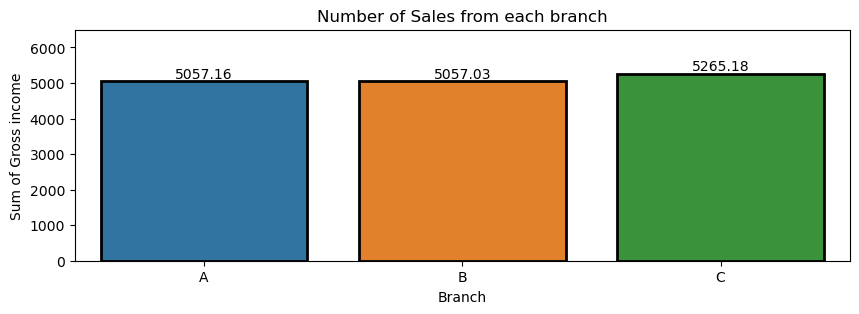

In [14]:
# most profitable branch as per gross income
fig,ax = plt.subplots(figsize=(10,3))
x = round(data.groupby('Branch')['gross income'].sum(),2).keys()
y = round(data.groupby('Branch')['gross income'].sum(),2).values
sns.barplot(x,y,ec='k',lw=2,ax=ax)
ax.bar_label(ax.containers[0])
plt.ylim(0,6500)
plt.ylabel('Sum of Gross income')
plt.xlabel('Branch')
plt.title('Number of Sales from each branch')
plt.show()

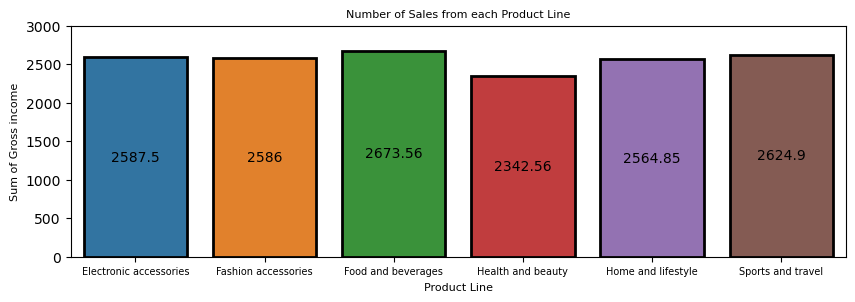

In [15]:
# most profitable branch as per gross income
fig,ax = plt.subplots(figsize=(10,3))
x = round(data.groupby('Product line')['gross income'].sum(),2).keys()
y = round(data.groupby('Product line')['gross income'].sum(),2).values
sns.barplot(x,y,ec='k',lw=2,ax=ax)
ax.bar_label(ax.containers[0],label_type='center')
plt.xticks(rotation=0,fontsize=7)
plt.ylim(0,3000)
plt.ylabel('Sum of Gross income',fontsize=8)
plt.xlabel('Product Line',fontsize=8)
plt.title('Number of Sales from each Product Line',fontsize=8)
plt.show()

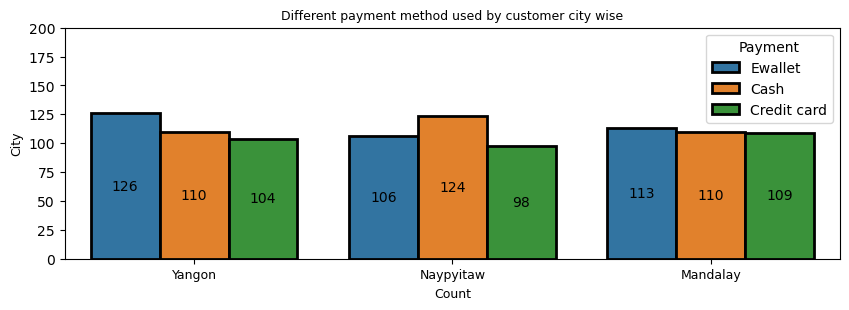

In [16]:
# different payment method used by customer city wise
fig,ax = plt.subplots(figsize=(10,3))
sns.countplot(data=data,x='City',hue='Payment',ec='k',lw=2,ax=ax)
ax.bar_label(ax.containers[0],label_type='center')
ax.bar_label(ax.containers[1],label_type='center')
ax.bar_label(ax.containers[2],label_type='center')
plt.xticks(rotation=0,fontsize=9)
plt.ylim(0,200)
plt.ylabel('City',fontsize=9)
plt.xlabel('Count',fontsize=9)
plt.title('Different payment method used by customer city wise',fontsize=9)
plt.show()

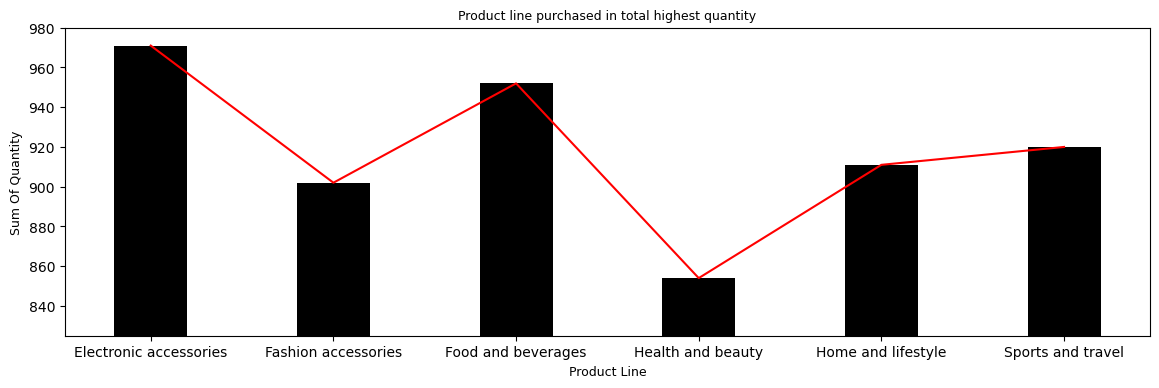

In [17]:
# which product line is purchased in total highest quantity
x = data.groupby('Product line')['Quantity'].sum().keys()
y = data.groupby('Product line')['Quantity'].sum()
plt.figure(figsize=(14,4))
plt.bar(x,y,color='k',width=.4)
plt.plot(x,y,color='r')
plt.ylim(825,980)
plt.ylabel('Sum Of Quantity',fontsize=9)
plt.xlabel('Product Line',fontsize=9)
plt.title('Product line purchased in total highest quantity',fontsize=9)
plt.show()